In [23]:
# -- Bib
import os
import sys
sys.path.append("..")

import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from fluxsus.DBFIX import DBFIX
from fluxsus.fluxnets.fluxnets import CityFlux, CityHospitalFlux
from fluxsus.utils_ import f_infomap

In [15]:
# -- Open the three main datasets: CNES, CE GEODATA, SIHSUS.
basepath = os.path.join(os.environ["HOMEPATH"], "Documents", "data")
cnespath = os.path.join(basepath, "opendatasus", "cnes")
sihpath = os.path.join(basepath, "opendatasus", "sihsus", "PARQUET")
geopath = os.path.join(basepath, "shapefilesceqgis")

cnes_df = pd.read_parquet(os.path.join(cnespath, "cnes_st_1001_2312.parquet"))
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))
sih_df = pd.read_parquet(os.path.join(sihpath, 'RDCE_2019.parquet'))

In [16]:
# -- Show Up
cnes_df.head()

CNES CODUFMUN   COD_CEP        CPF_CNPJ PF_PJ NIV_DEP        CNPJ_MAN  \
0  9999310   231130  63900085  00064176983353     1       1  00000000000000   
1  9999183   231340  62320069  05609698000241     3       1  00000000000000   
2  9998462   230765  61900410  33046146000127     3       1  00000000000000   
3  9998268   230730  63041187  29765135000120     3       1  00000000000000   
4  9997709   231290  62030362  06626253047387     3       1  00000000000000   

  COD_IR REGSAUDE MICR_REG  ... NAT_JUR AP01CV07 AP02CV07 AP03CV07 AP04CV07  \
0   None     None     None  ...    4000        0        0        0        0   
1   None     None     None  ...    2062        0        0        0        0   
2   None     None     None  ...    2135        0        0        0        0   
3   None       21     None  ...    2062        0        0        0        0   
4   None     None     None  ...    2046        0        0        0        0   

  AP05CV07 AP06CV07 AP07CV07  latitude  longitude  
0        0        0        0 -4.970753 -39.014854  
1        0        0        0 -3.725171 -40.991385  
2        0        0        0 -3.877000 -38.626000  
3        0        0        0 -7.213000 -39.315000  
4        0        0        0 -3.659824 -40.376779  

[5 rows x 210 columns]

In [17]:
sih_df.head()

ESPEC          N_AIH ANO_CMPT     CNES IDENT MUNIC_RES MARCA_UTI   VAL_SH  \
0    03  2318107044210     2019  6848710     1    231395        00  1289.50   
1    03  2319106936135     2019  6848710     1    230655        00   276.59   
2    03  2319106936146     2019  6848710     1    231200        75  2480.14   
3    03  2319106936267     2019  6848710     1    231290        75  2728.14   
4    03  2319106936333     2019  6848710     1    230900        00   487.13   

   VAL_SP  VAL_TOT  ...  DT_INTER  DT_SAIDA DIAG_PRINC DIAG_SECUN COBRANCA  \
0  109.83  1399.33  ...  20181222  20190116       I509       0000       41   
1   41.95   318.54  ...  20190104  20190109       K859       0000       12   
2  407.72  2887.86  ...  20190104  20190108       N189       0000       41   
3  217.82  2945.96  ...  20190105  20190115       J189       0000       41   
4   73.23   560.36  ...  20190105  20190119       E119       0000       12   

  NATUREZA GESTAO MUNIC_MOV MORTE  COMPLEX  
0       00      2    231290     1       02  
1       00      2    231290     0       02  
2       00      2    231290     1       02  
3       00      2    231290     1       02  
4       00      2    231290     0       02  

[5 rows x 21 columns]

In [18]:
geodata_df.head()

GEOCOD7 NM_MUNICIP GEOCOD6  MACRO_ID  CRES_ID  \
0  2300101    ABAIARA  230010         5       19   
1  2300150    ACARAPE  230015         1        3   
2  2300200     ACARAÚ  230020         4       12   
3  2300309   ACOPIARA  230030         5       18   
4  2300408     AIUABA  230040         2       14   

                                    geometry_municip  \
0  POLYGON ((-39.08246 -7.29577, -39.08347 -7.292...   
1  POLYGON ((-38.67268 -4.27393, -38.67268 -4.273...   
2  POLYGON ((-39.99113 -3.09797, -39.99117 -3.098...   
3  POLYGON ((-39.21390 -5.99175, -39.21278 -5.991...   
4  POLYGON ((-40.14849 -6.36051, -40.14816 -6.360...   

                                          MACRO_NOME  \
0          Superintendência Regional de Saúde Cariri   
1       Superintendência Regional de Saúde Fortaleza   
2           Superintendência Regional de Saúde Norte   
3          Superintendência Regional de Saúde Cariri   
4  Superintendência Regional de Saúde Sertão Central   

                                      geometry_macro  \
0  POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...   
1  MULTIPOLYGON (((-39.69667 -2.99902, -39.69216 ...   
2  MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...   
3  POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...   
4  POLYGON ((-40.08511 -6.36860, -40.08445 -6.370...   

                                       geometry_cres  \
0  POLYGON ((-4354692.823 -865196.973, -4354812.2...   
1  POLYGON ((-4325426.833 -465433.632, -4325426.8...   
2  POLYGON ((-4503430.806 -312287.468, -4503430.7...   
3  POLYGON ((-4440719.425 -681940.298, -4440964.9...   
4  POLYGON ((-4448196.104 -680357.114, -4447996.7...   

             centroid_municip  municip_lon  municip_lat  
0  POINT (-39.03754 -7.35991)   -39.037538    -7.359907  
1  POINT (-38.66305 -4.22242)   -38.663052    -4.222417  
2  POINT (-40.08913 -2.96792)   -40.089128    -2.967916  
3  POINT (-39.49282 -6.12241)   -39.492823    -6.122411  
4  POINT (-40.29895 -6.60520)   -40.298951    -6.605196

In [19]:
# -- define ICD-10 filters
icd_chapters_codes = {
        "I": [ 'A'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ]+[ 'B'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 99) ],
        "II": [ 'C'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ]+[ 'D'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 49) ],
        "III": [ 'D'+f'{n:2.0f}'.replace(' ', '0') for n in range(50, 90) ],
        "V": [ 'F'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ],
        "IX": [ 'I'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ],
        "X": [ 'J'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ],
        "XX": [ 'V'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ]+[ 'Y'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 99) ]
    }

In [28]:
def create_citynet(cnes_df, geodata_df, inicial, final):
    sih_df = []
    for year in range(int(inicial), int(final)+1):
        cur_df = pd.read_parquet(os.path.join(sihpath, f"RDCE_{year}.parquet"))
        sih_df.append(cur_df)
    sih_df = pd.concat(sih_df)

    # -- generate network
    cityflux = CityFlux(cnes_df, geodata_df)
    cityflux.define_network().calculate_fluxes(sih_df)
    return cityflux

In [29]:
cityflux = create_citynet(cnes_df, geodata_df, 2018, 2022)

In [25]:
g = cityflux.graph
modules = f_infomap(g, weight_col="admission_count")
modules = f_infomap(g, weight_col="total_cost")

found 12 modules with codelength: 2.485608665432075
found 6 modules with codelength: 2.3554853661369735


In [12]:
hospitalflux = CityHospitalFlux(cnes_df, geodata_df)
hospitalflux.define_network().calculate_fluxes(sih_df)
print(hospitalflux.graph.number_of_nodes(), hospitalflux.graph.number_of_edges())

16714 5940


In [14]:
g = hospitalflux.graph
g.number_of_nodes()
for v in g.nodes():
    print(g.nodes[v])

{'type': 'city', 'code': '230010', 'name': 'ABAIARA', 'municip_code': '230010', 'macro_id': 5, 'macro_name': 'Superintendência Regional de Saúde Cariri', 'cres_id': 19, 'lat': -7.35990681440754, 'lon': -39.03753839591732}
{'type': 'city', 'code': '230015', 'name': 'ACARAPE', 'municip_code': '230015', 'macro_id': 1, 'macro_name': 'Superintendência Regional de Saúde Fortaleza', 'cres_id': 3, 'lat': -4.222416608737582, 'lon': -38.66305163009473}
{'type': 'city', 'code': '230020', 'name': 'ACARAÚ', 'municip_code': '230020', 'macro_id': 4, 'macro_name': 'Superintendência Regional de Saúde Norte', 'cres_id': 12, 'lat': -2.9679160902325012, 'lon': -40.08912756257292}
{'type': 'city', 'code': '230030', 'name': 'ACOPIARA', 'municip_code': '230030', 'macro_id': 5, 'macro_name': 'Superintendência Regional de Saúde Cariri', 'cres_id': 18, 'lat': -6.122410811817975, 'lon': -39.49282251016669}
{'type': 'city', 'code': '230040', 'name': 'AIUABA', 'municip_code': '230040', 'macro_id': 2, 'macro_name':

In [20]:
sih_df[["VAL_SH", "VAL_SP", "VAL_TOT", "VAL_UTI", "COMPLEX"]]
sih_df["COMPLEX"].value_counts()

COMPLEX
02    500399
03     30884
Name: count, dtype: int64

In [9]:
g = cityflux.graph

In [14]:
for v in g.nodes():
    if g.degree[v]==0:
        print(g.nodes[v])

In [10]:
g.number_of_edges()

1740

In [11]:
for v in g.edges():
    print(g.edges[v])

{'admission_count': 1, 'total_cost': 647.11, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 65, 'total_cost': 122726.52, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 351, 'total_cost': 194571.67, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 23, 'total_cost': 171152.38999999998, 'source_macro': 5.0, 'target_macro': 1}
{'admission_count': 34, 'total_cost': 77210.76, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 1, 'total_cost': 294.38, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 4, 'total_cost': 2223.74, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 334, 'total_cost': 554342.58, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 403, 'total_cost': 232246.48, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 3, 'total_cost': 1048.45, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 3, 'total_cost': 3573.6, 'source_macro': 1.0, 'target_macro': 2}
{'admission_count': 206, 'to

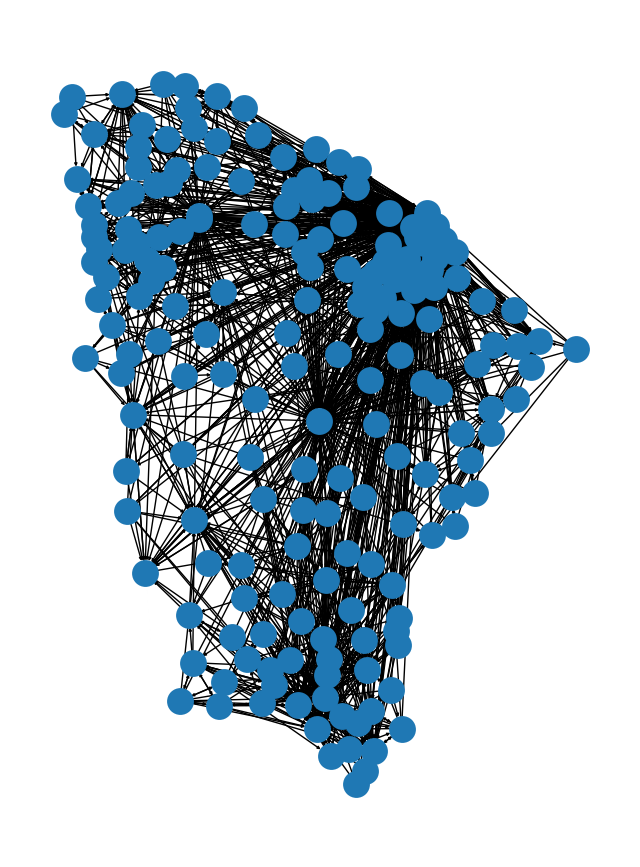

In [12]:
fig, ax = plt.subplots(1, figsize=(8,11))

nx.draw(g, pos=cityflux.geopos_net, ax=ax, arrows=True, arrowsize=4, alpha=1.0, linewidths=2)

In [31]:
cityflux.geopos_net

{0: array([-39.0375384 ,  -7.35990681]),
 1: array([-38.66305163,  -4.22241661]),
 2: array([-40.08912756,  -2.96791609]),
 3: array([-39.49282251,  -6.12241081]),
 4: array([-40.29895074,  -6.60519605]),
 5: array([-40.54461515,  -3.59283486]),
 6: array([-39.69888313,  -6.98578093]),
 7: array([-38.20057194,  -5.51762481]),
 8: array([-39.78571855,  -3.23993683]),
 9: array([-39.98158972,  -6.75666539]),
 10: array([-39.32128913,  -3.97139379]),
 11: array([-38.39440044,  -3.97645953]),
 12: array([-37.68676162,  -4.68050123]),
 13: array([-38.71612826,  -4.48329177]),
 14: array([-40.74695408,  -4.77294546]),
 15: array([-40.07665852,  -7.2390243 ]),
 16: array([-39.02707038,  -4.42067915]),
 17: array([-40.1551591 ,  -6.23918614]),
 18: array([-39.86955194,  -6.91423386]),
 19: array([-38.96921373,  -6.98919141]),
 20: array([-38.7531842 ,  -6.71189122]),
 21: array([-38.90338011,  -5.26245385]),
 22: array([-39.34452717,  -7.40315301]),
 23: array([-38.6205714 ,  -4.32755842]),
 2

In [17]:
sih_df.columns

Index(['ESPEC', 'N_AIH', 'ANO_CMPT', 'CNES', 'IDENT', 'MUNIC_RES', 'MARCA_UTI',
       'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'GESTAO',
       'MUNIC_MOV', 'MORTE', 'COMPLEX'],
      dtype='object')

In [ ]:
sih_df["EDGE"] = sih_df["MUNIC_RES"]+"-"+sih_df["MUNIC_MOV"]

In [7]:
grouped = sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"]).agg(['sum', 'count'])["VAL_TOT"].reset_index()

In [9]:
grouped[grouped["MUNIC_RES"]!=grouped["MUNIC_MOV"]]

MUNIC_RES MUNIC_MOV      sum  count
0       110002    230440   454.69      1
1       110005    231140   213.92      1
2       110020    230440  8301.29      8
3       110020    231290    60.22      1
4       110030    230440  2315.84      4
...        ...       ...      ...    ...
2915    530010    231290  3265.96      5
2916    530010    231330   837.43      2
2917    530010    231360   324.62      1
2918    530010    231400   778.70      1
2919    530010    231410  2275.22      4

[2756 rows x 4 columns]

In [21]:
cnes_df

CNES CODUFMUN   COD_CEP        CPF_CNPJ PF_PJ NIV_DEP  \
0      9999310   231130  63900085  00064176983353     1       1   
1      9999183   231340  62320069  05609698000241     3       1   
2      9998462   230765  61900410  33046146000127     3       1   
3      9998268   230730  63041187  29765135000120     3       1   
4      9997709   231290  62030362  06626253047387     3       1   
...        ...      ...       ...             ...   ...     ...   
16526  0038997   230730  63041155  00087511525334     1       1   
16527  0037761   230740  63580000  10709644000107     3       1   
16528  0032913   230320  63220000  30193721000126     3       1   
16529  0029807   231290  62010790  15380257000193     3       1   
16530  0029793   231290  62010820  33993930000142     3       1   

             CNPJ_MAN COD_IR REGSAUDE MICR_REG  ... NAT_JUR AP01CV07 AP02CV07  \
0      00000000000000   None     None     None  ...    4000        0        0   
1      00000000000000   None     None     None  ...    2062        0        0   
2      00000000000000   None     None     None  ...    2135        0        0   
3      00000000000000   None       21     None  ...    2062        0        0   
4      00000000000000   None     None     None  ...    2046        0        0   
...               ...    ...      ...      ...  ...     ...      ...      ...   
16526  00000000000000   None       21     None  ...    4000        0        0   
16527  00000000000000   None     None     None  ...    2232        0        0   
16528  00000000000000   None     None     None  ...    2135        0        0   
16529  00000000000000   None     None     None  ...    2240        0        0   
16530  00000000000000   None     None     None  ...    2135        0        0   

      AP03CV07 AP04CV07 AP05CV07 AP06CV07 AP07CV07  latitude  longitude  
0            0        0        0        0        0 -4.970753 -39.014854  
1            0        0        0        0        0 -3.725171 -40.991385  
2            0        0        0        0        0 -3.877000 -38.626000  
3            0        0        0        0        0 -7.213000 -39.315000  
4            0        0        0        0        0 -3.659824 -40.376779  
...        ...      ...      ...      ...      ...       ...        ...  
16526        0        0        0        0        0 -7.224605 -39.315000  
16527        0        0        0        0        0 -6.523760 -39.525774  
16528        0        0        0        0        0 -7.043089 -39.282957  
16529        0        0        0        0        0 -3.690589 -40.355266  
16530        0        0        0        0        0 -3.688455 -40.354557  

[16531 rows x 210 columns]

In [36]:
sih_df[(sih_df["MUNIC_RES"]=="231375") & (sih_df["MUNIC_MOV"]=="230440")]["VAL_TOT"]

15947     709.05
21131     270.54
21553     723.90
21698     802.70
21849     701.68
          ...   
24374    2163.02
25282     560.28
25403    6455.86
25773     562.28
27589     709.05
Name: VAL_TOT, Length: 222, dtype: float64

In [64]:
def vectorized_app(df):
    arr_slice = df[['MUNIC_RES', 'MUNIC_MOV']].values
    lidx = np.ravel_multi_index(arr_slice.T,(7,8))
    unq,unqtags,counts = np.unique(lidx,return_inverse=True,return_counts=True)
    return counts[unqtags]

In [65]:
xx = vectorized_app(sih_df)

TypeError: only int indices permitted

In [16]:
arr_pairs = sih_df[["MUNIC_RES", "MUNIC_MOV"]].values
arr_pairs

array([['231395', '231290'],
       ['230655', '231290'],
       ['231200', '231290'],
       ...,
       ['231410', '231410'],
       ['231410', '231410'],
       ['231410', '231410']], dtype=object)

In [9]:
ex = sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"])

In [18]:
idx = (sih_df["MUNIC_RES"]+"-"+sih_df["MUNIC_MOV"]).values

In [19]:
idx

array(['231395-231290', '230655-231290', '231200-231290', ...,
       '231410-231410', '231410-231410', '231410-231410'], dtype=object)

In [20]:
np.unique(idx)

array(['231395-231290', '230655-231290', '231200-231290', ...,
       '231410-231410', '231410-231410', '231410-231410'], dtype=object)

In [21]:
sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"])["VAL_TOT"].transform('sum')

0         1047835.00
1         1314134.94
2         1173993.29
3        15200107.59
4          695225.14
            ...     
43064      983160.35
43065      983160.35
43066      983160.35
43067      983160.35
43068      983160.35
Name: VAL_TOT, Length: 531283, dtype: float64

In [25]:
sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"])["VAL_TOT"].agg('count')

MUNIC_RES  MUNIC_MOV
110002     230440       1
110005     231140       1
110020     230440       8
           231290       1
110030     230440       4
                       ..
530010     231290       5
           231330       2
           231360       1
           231400       1
           231410       4
Name: VAL_TOT, Length: 2920, dtype: int64

In [26]:
sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"])["VAL_TOT"].agg(['sum', 'count']).reset_index()

MUNIC_RES MUNIC_MOV      sum  count
0       110002    230440   454.69      1
1       110005    231140   213.92      1
2       110020    230440  8301.29      8
3       110020    231290    60.22      1
4       110030    230440  2315.84      4
...        ...       ...      ...    ...
2915    530010    231290  3265.96      5
2916    530010    231330   837.43      2
2917    530010    231360   324.62      1
2918    530010    231400   778.70      1
2919    530010    231410  2275.22      4

[2920 rows x 4 columns]